# The dataset used is downloaded for MIT BIH Arrhythmia Database

source: https://physionet.org/content/mitdb/1.0.0/

# Importing Libraries and dependencies
We use **TensorFlow** for Creating sessions and deep learning models

**Sklearn** classes for splitting into training and testing

**Keras** for training and tuning Convolutional Neural Networks

**NumPy** for Linear algebraic functions and implementations

**Matplotlib** for Visualiszations

**itertools** for parallelizing essential grouping and combination functions



In [1]:
# libraries
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import itertools
import collections

%matplotlib inline

# Configuring Matplotlib

Setting parameters like:
1. **Figure size**
2. **Linewidth of the plot**
3. **Colours**
4. **Grid Presence**

In [2]:
# matplotlib settings
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True 

# Creation of Helper Functions For Further Analysis

Helper Functions created For:

**1. Splitting Datasets into training and testing sets**

**2. Declaring training and testing sets as tensorflow session variables**

**3. Plotting the Confusion Matrix**

**4. Setting Up Normalization for confusion matrix**

In [3]:
# Train Inputs
def get_train_inputs():
    x = tf.constant(X_train)
    y = tf.constant(y_train)
    return x, y

# Test Inputs
def get_test_inputs():
    x = tf.constant(X_test)
    y = tf.constant(y_test)
    return x, y

# Eval data
def get_eval_data():
    return tf.constant(X_test)

# Plot matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #cm[i, j] = 0 if np.isnan(cm[i, j]) else cm[i, j]
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Class labels information

Helper Functions created For:

**1. Normal beat(N):** No anomalies detected.

**2. Left bundle branch block beat(L):**  In this condition, activation of the left ventricle of the heart is delayed, which causes the left ventricle to contract later than the right ventricle

**3. Right bundle branch block beat(R):** Electrical impulses that cause your heart to beat (contract) start in the heart's upper right chamber (right atrium) and travel to the lower chambers (ventricles). In bundle branch block, the pathway these impulses follow is delayed or blocked.

**4. Atrial premature beat(A):** Occurs when a focus in the atrium (not the sinoatrial node) generates an action potential before the next scheduled SA node action potential.

**5. Paced beat(/):**In these cases, a paced beat will be seen after a pause that is equal to this lower predetermined heart rate. For example, if the pacemaker is set at 60 beats/min, the pacemaker will only pace if the rate falls below 60 beats/min or if there is a pause of one second (60 beats/min ÷ 60 sec/min)

# Importing the Dataset


In [4]:
# Variables

path = 'C:\\Users\\DEV\Downloads\\archive\\mitbih_database\\mitbih_database\\'
window_size = 160
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V', '/']
n_classes = len(classes)
count_classes = [0]*n_classes

X = list()
y = list()

In [5]:
# Read files
filenames = next(os.walk(path))[2]

# Split and save .csv , .txt 
records = list()
annotations = list()
filenames.sort()

# Appening multiple datasets together

In [6]:
# segrefating filenames and annotations
for f in filenames:
    filename, file_extension = os.path.splitext(f)
    
    # *.csv
    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    # *.txt
    else:
        annotations.append(path + filename + file_extension)

# Plotting Example Records and creating Predictor and  Labels Matrix

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-7-18de919ece03>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:


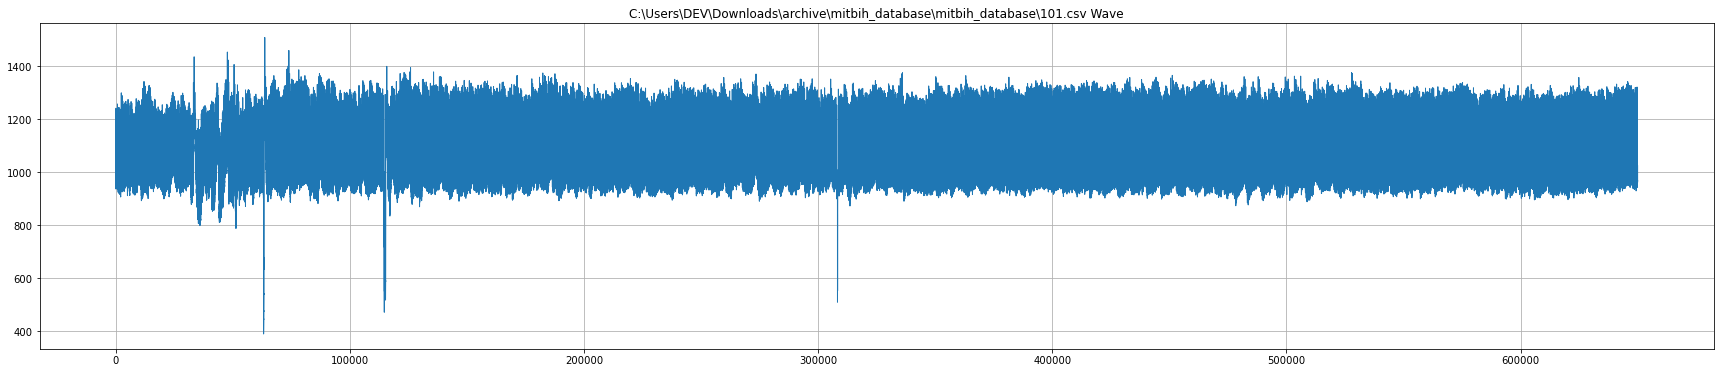

In [7]:
# Records
for r in range(0,len(records)):
# for r in range(2, 3):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1
            
    if r is 1:
        # Plot each patient's signal
        plt.title(records[1] + " Wave")
        plt.plot(signals)
        plt.show()

    # Read anotations: R position and Arrhythmia class
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines() 
        beat = list()

        for d in range(1, len(data)): # 0 index is Chart Head
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted) # Time... Clipping
            pos = int(next(splitted)) # Sample ID
            arrhythmia_type = next(splitted) # Type
            if(arrhythmia_type in classes):
                arrhythmia_index = classes.index(arrhythmia_type)
                if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
                    pass
                else:
                    count_classes[arrhythmia_index] += 1
                    if(window_size < pos and pos < (len(signals) - window_size)):
                        beat = signals[pos-window_size+1:pos+window_size]
                        X.append(beat)
                        y.append(arrhythmia_index)

In [8]:
# data shape
# print(np.shape(X), np.shape(y))

# Plotting a fixed windowsize Electro Cardio Gram

0


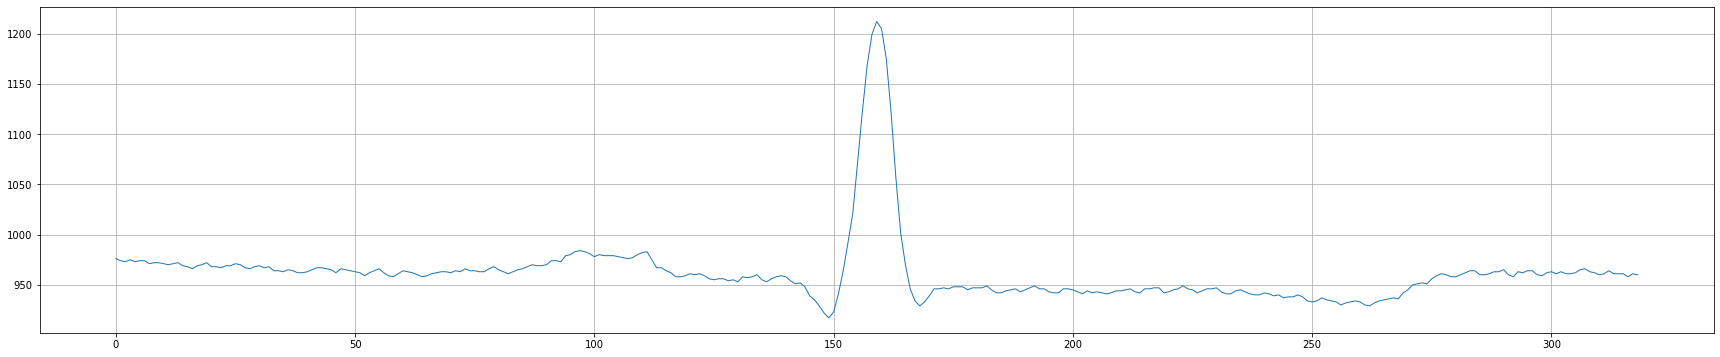

In [9]:
# plotting beat
plt.plot(X[0])
print(y[0])

In [10]:
for i in range(0,len(X)):
        X[i].append(y[i])

print(np.shape(X))

(42021, 320)


# Labels Analysis for diagnosing Skewness

0    9997
1    8071
2    7255
4    7129
5    7023
3    2546
Name: 319, dtype: int64


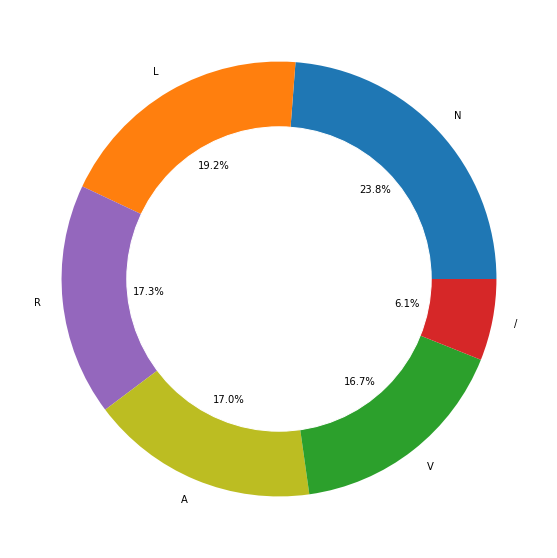

In [11]:
# representation of classes % wise
X_train_df = pd.DataFrame(X)
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Rectifying The Differences in training examples for all labels

In [12]:
# plot_percentage()
from sklearn.utils import resample

df_1=X_train_df[X_train_df[319]==1]
df_2=X_train_df[X_train_df[319]==2]
df_3=X_train_df[X_train_df[319]==3]
df_4=X_train_df[X_train_df[319]==4]
df_5=X_train_df[X_train_df[319]==5]
df_0=(X_train_df[X_train_df[319]==0]).sample(n=5000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=5000,random_state=122)
df_2_upsample=resample(df_2,replace=True,n_samples=5000,random_state=123)
df_3_upsample=resample(df_3,replace=True,n_samples=5000,random_state=124)
df_4_upsample=resample(df_4,replace=True,n_samples=5000,random_state=125)
df_5_upsample=resample(df_5,replace=True,n_samples=5000,random_state=126)

X_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample,df_5_upsample])


5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
Name: 319, dtype: int64


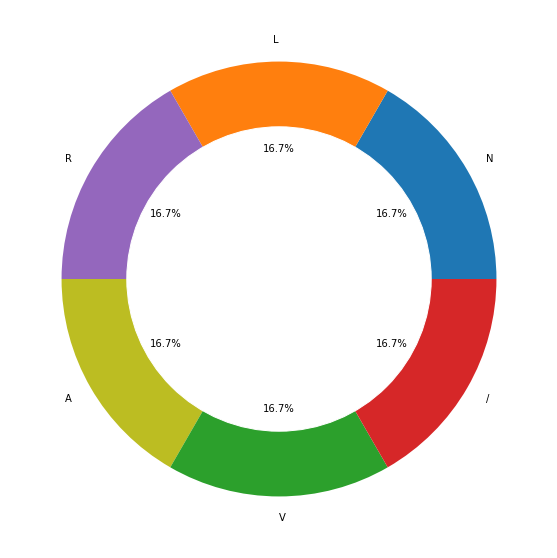

In [13]:
per_class = X_train_df[319].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Splitting Into Training and Testing sets

In [14]:
# Train Test Split
train, test = train_test_split(X_train_df, test_size=0.20)

print("X_train : ", len(train))
print("X_test  : ", len(test))

X_train :  24000
X_test  :  6000


# Encoding Target Variables

In [15]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
print(np.shape(y_train), np.shape(y_test))

(24000, 6) (6000, 6)


# Setting Up 3D convolutional Layers for further training

In [16]:
X_train = train.iloc[:,:train.shape[1]-1].values
X_test = test.iloc[:,:test.shape[1]-1].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)
print(np.shape(X_train))

(24000, 319, 1)


# Importing all possible models to be implemented

In [17]:
# from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, concatenate, MaxPool2D, ELU
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling2D
# from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
# from keras import optimizers, losses, activations, models

# model = Sequential()
# model.add(Conv2D(64, (3,3),strides = (1,1), input_shape = IMAGE_SIZE + [3],kernel_initializer='glorot_uniform'))


# model.add(keras.layers.ELU())

# model.add(BatchNormalization())

# model.add(Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

# model.add(keras.layers.ELU())

# model.add(BatchNormalization())

# model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

# model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

# model.add(keras.layers.ELU())

# model.add(BatchNormalization())

# model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

# model.add(keras.layers.ELU())

# model.add(BatchNormalization())

# model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

# model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

# model.add(keras.layers.ELU())

# model.add(BatchNormalization())

# model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

# model.add(keras.layers.ELU())

# model.add(BatchNormalization())

# model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

# model.add(Flatten())

# model.add(Dense(2048))


# model.add(keras.layers.ELU())

# model.add(BatchNormalization())

# model.add(Dropout(0.5))

# model.add(Dense(7, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# print(model.summary())

# gen = ImageDataGenerator()

# test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)

# train_gen = gen.flow_from_directory(train_path, target_size=IMAGE_SIZE)

# train_generator = gen.flow_from_directory(
#   train_path,
#   target_size=IMAGE_SIZE,
#   shuffle=True,
#   batch_size=batch_size,
# )
# valid_generator = gen.flow_from_directory(
#   valid_path,
#   target_size=IMAGE_SIZE,
#   shuffle=True,
#   batch_size=batch_size,
# )
# callbacks_list = [checkpoint]

# r = model.fit_generator(
#   train_generator,
#   validation_data=valid_generator,
#   epochs=50,
#   steps_per_epoch=356702//batch_size,
#   validation_steps=39634//batch_size,callbacks=callbacks_list
# )

In [18]:
X_train.shape[1]

319

# Training the best Model

Convolutional Neural Networks with **6 Hidden Layers** 

**5 Convolutional Layers**

**Applying Concepts like DropOut, Batch-Normalization, Pooling - (Max, Min, Average)**

**1 Output Layer**

**Applying Softmax activation function for multiclass classification**

**Using Adam Optimizer for gradient descent implementation for faster training and better results**

In [19]:
# Network
def network(X_train,y_train,X_test,y_test):
    im_shape=(X_train.shape[1],1)
#     model = Sequential()
#     model.add(Conv1D(64, (6),strides = (1), input_shape = (im_shape),kernel_initializer='glorot_uniform'))
#     model.add(keras.layers.ELU())
#     model.add(BatchNormalization())
#     model.add(Conv1D(64, (3),strides = (1),kernel_initializer='glorot_uniform'))
#     model.add(keras.layers.ELU())
#     model.add(BatchNormalization())
#     model.add(MaxPool2D(pool_size=(2), strides= (2)))
#     model.add(Conv1D(128, (3),strides = (1),kernel_initializer='glorot_uniform'))
#     model.add(keras.layers.ELU())
#     model.add(BatchNormalization())
#     model.add(Conv1D(128, (3),strides = (1),kernel_initializer='glorot_uniform'))
#     model.add(keras.layers.ELU())
#     model.add(BatchNormalization())
#     model.add(MaxPool2D(pool_size=(2), strides= (2)))
#     model.add(Conv1D(256, (3),strides = (1),kernel_initializer='glorot_uniform'))
#     model.add(keras.layers.ELU())
#     model.add(BatchNormalization())
#     model.add(Conv1D(256, (3),strides = (1),kernel_initializer='glorot_uniform'))
#     model.add(keras.layers.ELU())
#     model.add(BatchNormalization())
#     model.add(MaxPool2D(pool_size=(2), strides= (2)))
#     model.add(Flatten())
#     model.add(Dense(2048))
#     model.add(keras.layers.ELU())
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
#     model.add(Dense(6, activation='softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
    
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    # convolutional layer 1
    conv1_1=Convolution1D(64, (6), activation='elu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    #pooling layer 1
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    # convolutional layer 2
    conv2_1=Convolution1D(128, (3), activation='elu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    # convolutional layer 3
    conv3_1=Convolution1D(128, (3), activation='elu', input_shape=im_shape)(conv2_1)
    conv3_1=BatchNormalization()(conv3_1)
    #pooling layer 2
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    # convolutional layer 4
    conv4_1=Convolution1D(256, (3), activation='elu', input_shape=im_shape)(pool2)
    conv4_1=BatchNormalization()(conv4_1)
    # convolutional layer 5
    conv5_1=Convolution1D(256, (3), activation='elu', input_shape=im_shape)(conv4_1)
    conv5_1=BatchNormalization()(conv5_1)
    #pooling layer 3
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv5_1)
    # flattened layer 1
    flatten=Flatten()(pool3)
    # dense layers
    dense_end1 = Dense(1024, activation='elu')(flatten)
#     dense_end2 = Dense(1024, activation='elu')(dense_end1)
#     dense_end3 = Dense(512, activation='elu')(dense_end2)
#     dense_end2 = Dense(64, activation='elu')(dense_end1)
#     dense_end5 = Dense(128, activation='elu')(dense_end4)
#     dense_end6 = Dense(64, activation='elu')(dense_end5)
# #     dense_end7 = Dense(32, activation='elu')(dense_end6)
    #output layers
    main_output = Dense(6, activation='softmax', name='main_output')(dense_end1)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=10,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

# Model Evaluation

In [20]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4','5']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

# Training n iterations 

In [21]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/10
750/750 [==============================] - 207s 276ms/step - loss: 0.3130 - accuracy: 0.9536 - val_loss: 5.3387 - val_accuracy: 0.3843
Epoch 2/10
750/750 [==============================] - 205s 273ms/step - loss: 0.0729 - accuracy: 0.9844 - val_loss: 3.4342 - val_accuracy: 0.6503
Epoch 3/10
750/750 [==============================] - 197s 263ms/step - loss: 0.0814 - accuracy: 0.9858 - val_loss: 12.6646 - val_accuracy: 0.4335
Epoch 4/10
750/750 [==============================] - 201s 268ms/step - loss: 0.0650 - accuracy: 0.9889 - val_loss: 19.2696 - val_accuracy: 0.4555
Epoch 5/10
750/750 [==============================] - 192s 256ms/step - loss: 0.0616 - accuracy: 0.9902 - val_loss: 60.7191 - val_accuracy: 0.2525
Epoch 6/10
750/750 [==============================] - 189s 252ms/step - loss: 0.0743 - accuracy: 0.9894 - val_loss: 40.3317 - val_accuracy: 0.3572
Epoch 7/10
750/750 [==============================] - 191s 255ms/step - loss: 0.0300 - accuracy: 0.9956 - val_loss: 0.25

# Plotting accuracy and loss function learning curve

Accuracy: 98.90%


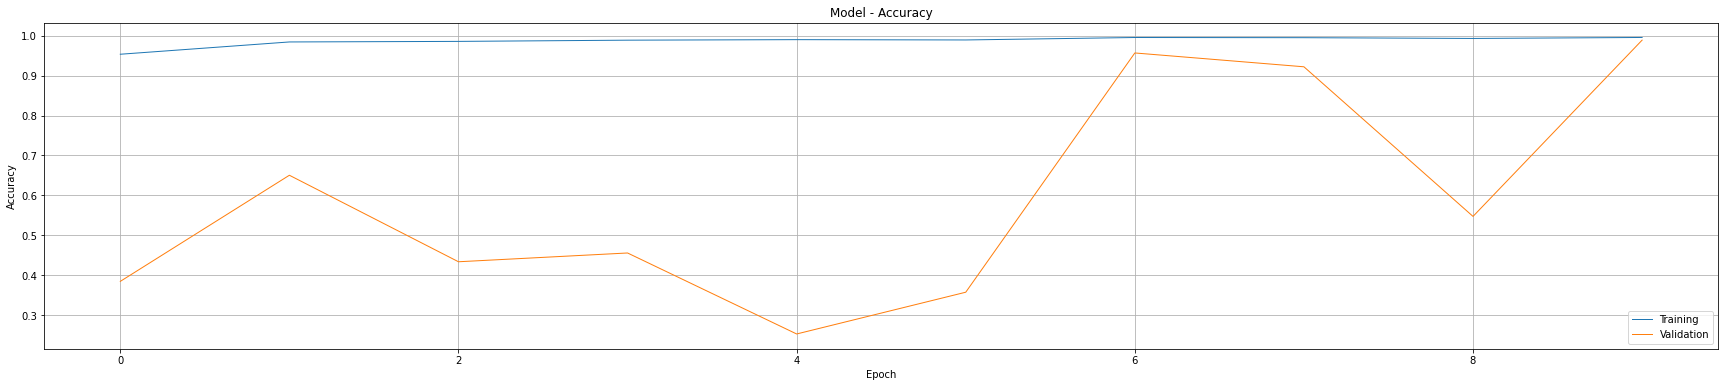

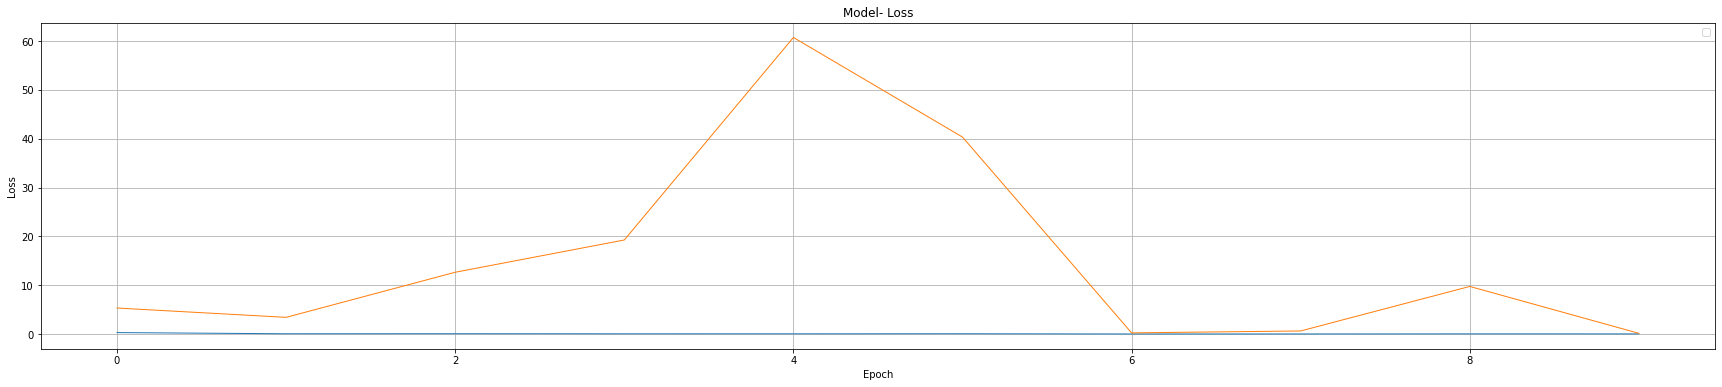

In [22]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

# Plotting the Confusion Matrix

Confusion matrix, without normalization


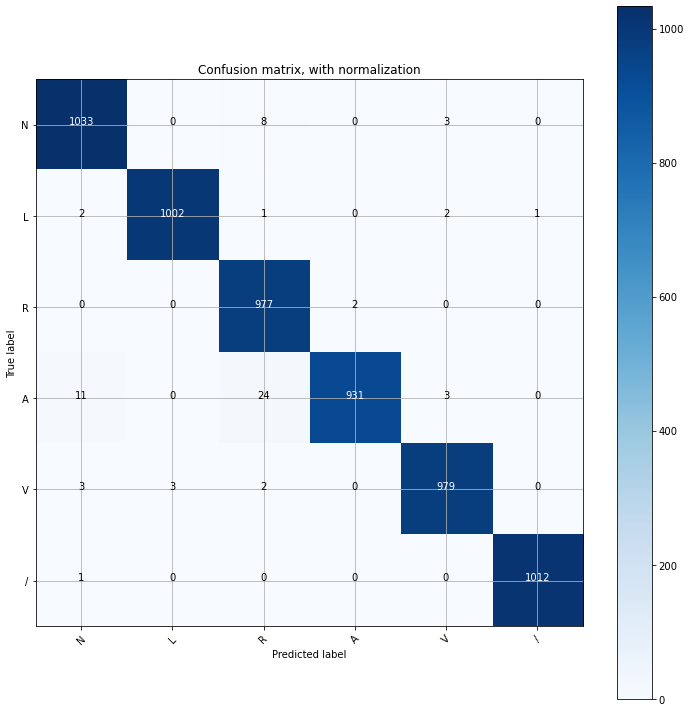

In [23]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'L', 'R', 'A', 'V', '/'],normalize=False,
                      title='Confusion matrix, with normalization')
plt.show()

In [27]:
print(metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1),digits=6))

              precision    recall  f1-score   support

           0   0.983810  0.989464  0.986628      1044
           1   0.997015  0.994048  0.995529      1008
           2   0.965415  0.997957  0.981416       979
           3   0.997856  0.960784  0.978970       969
           4   0.991895  0.991895  0.991895       987
           5   0.999013  0.999013  0.999013      1013

    accuracy                       0.989000      6000
   macro avg   0.989167  0.988860  0.988908      6000
weighted avg   0.989192  0.989000  0.988994      6000



# Plotting the Confusion Matrix

Normalized confusion matrix


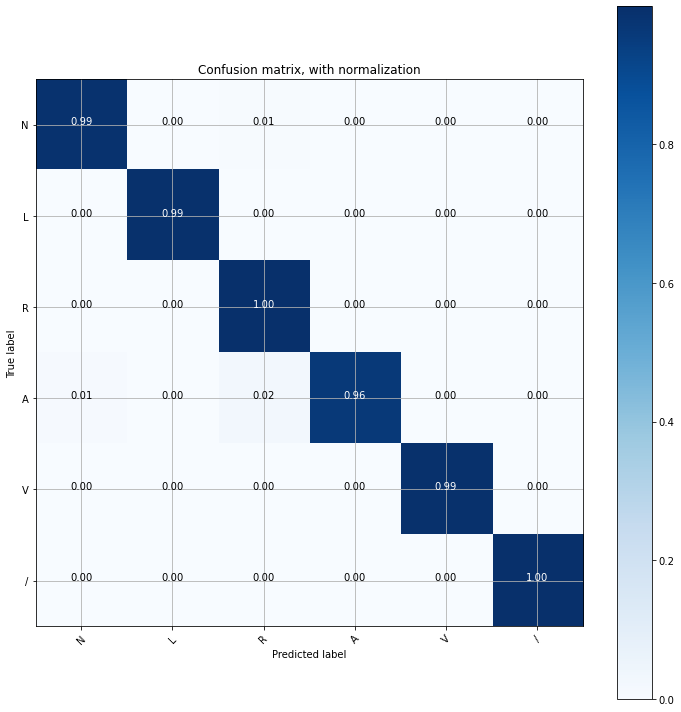

In [24]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'L', 'R', 'A', 'V', '/'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()